# Importation des packages

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
import seaborn as sns

from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D
from keras.models import Model
from keras import initializers, regularizers, constraints, optimizers, layers

# Importation des données

Ajoutez un raccourci de ce dossier à votre google drive :

https://drive.google.com/drive/folders/1mx-CAzT10YKrmxHfYDP_1Oef7PVGUr7s?usp=sharing

In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [52]:
data = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/train.csv')
test = pd.read_csv('/content/drive/MyDrive/data_classification_commentaires_toxiques/test.csv')

# Etude du jeu de données

Utilisation de ce guide: https://www.kaggle.com/code/sbongo/for-beginners-tackling-toxic-using-keras

In [53]:
list_classes = ["toxic", "severe_toxic", "obscene", "threat", "insult", "identity_hate"]
y = data[list_classes].values
list_sentences_train = data["comment_text"]
list_sentences_test = test["comment_text"]

# Préparation des données

In [54]:
max_features = 20000
tokenizer = Tokenizer(num_words=max_features)
tokenizer.fit_on_texts(list(list_sentences_train))
list_tokenized_train = tokenizer.texts_to_sequences(list_sentences_train)
list_tokenized_test = tokenizer.texts_to_sequences(list_sentences_test)

In [27]:
list_tokenized_train[:1]

[[688,
  75,
  1,
  126,
  130,
  177,
  29,
  672,
  4511,
  12052,
  1116,
  86,
  331,
  51,
  2278,
  11448,
  50,
  6864,
  15,
  60,
  2756,
  148,
  7,
  2937,
  34,
  117,
  1221,
  15190,
  2825,
  4,
  45,
  59,
  244,
  1,
  365,
  31,
  1,
  38,
  27,
  143,
  73,
  3462,
  89,
  3085,
  4583,
  2273,
  985]]

In [56]:
# Adding padding in case sentences aren't the same length
maxlen = 200
X_t = pad_sequences(list_tokenized_train, maxlen=maxlen)
X_te = pad_sequences(list_tokenized_test, maxlen=maxlen)

In [57]:
totalNumWords = [len(one_comment) for one_comment in list_tokenized_train]

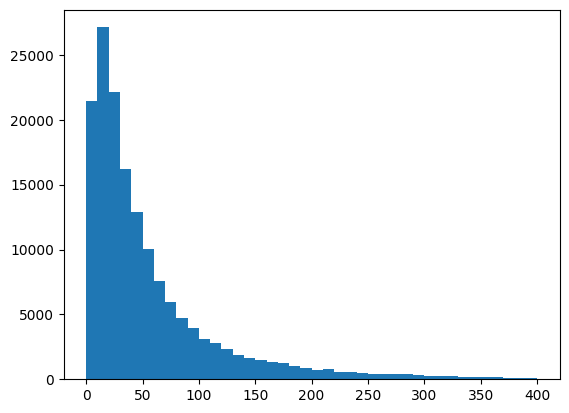

In [58]:
plt.hist(totalNumWords,bins = np.arange(0,410,10))
plt.show()

In [59]:
inp = Input(shape=(maxlen, )) #maxlen=200 as defined earlier

In [60]:
embed_size = 128
x = Embedding(max_features, embed_size)(inp)

# Création du modèle

In [61]:
x = LSTM(60, return_sequences=True, name='lstm_layer')(x)
x = GlobalMaxPool1D()(x)
x = Dropout(0.1)(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(6, activation="sigmoid")(x)

In [62]:
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

# Entraînement du modèle baseline

In [63]:
batch_size = 32
epochs = 2
model.fit(X_t,y, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/2
4488/4488 [==============================] - 412s 91ms/step - loss: 0.0709 - accuracy: 0.9378 - val_loss: 0.0495 - val_accuracy: 0.9940
Epoch 2/2
4488/4488 [==============================] - 398s 89ms/step - loss: 0.0452 - accuracy: 0.9859 - val_loss: 0.0476 - val_accuracy: 0.9940


# Itération de la modélisation

In [ ]:
model.summary()

In [64]:
from keras import backend as K

# with a Sequential model
get_3rd_layer_output = K.function([model.layers[0].input],
                                  [model.layers[2].output])
layer_output = get_3rd_layer_output([X_t[:1]])[0]
layer_output.shape

(1, 200, 60)

In [65]:
print (layer_output)

[[[ 0.02213917  0.01540503  0.01454973 ... -0.5494794  -0.13409226
   -0.49218595]
  [ 0.01337736  0.00861183  0.01090227 ... -0.7289836  -0.17683542
   -0.7464067 ]
  [ 0.01380983  0.00683366  0.0094933  ... -0.77901995 -0.23083007
   -0.8238837 ]
  ...
  [-0.01411909 -0.06640089  0.27212295 ... -0.53284806 -0.09330856
   -0.641167  ]
  [-0.01781534 -0.25121897  0.36136898 ... -0.55290675 -0.02570876
   -0.6205652 ]
  [-0.01548978 -0.2686188   0.30503753 ... -0.6179171  -0.05277883
   -0.74960065]]]
